In [1]:
from sklearn.datasets import make_classification

In [2]:
x, y = make_classification(
    n_samples=1000, n_redundant=0,
    n_features=2, n_clusters_per_class=1,
    weights=[0.90], random_state=12
)

In [3]:
import pandas as pd
df1 = pd.DataFrame(x, columns=['f1','f2'])
df2 = pd.DataFrame(y, columns=['target'])
final_df = pd.concat([df1, df2], axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [4]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

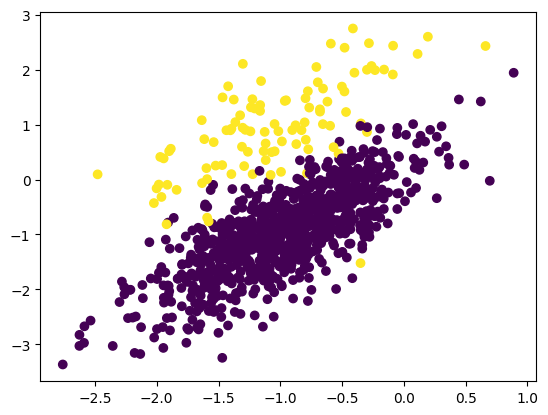

In [5]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])

In [8]:
from imblearn.over_sampling import SMOTE

In [9]:
## Transform the dataset
oversample = SMOTE() 
x, y = oversample.fit_resample(final_df[['f1','f2']], final_df['target'])

In [10]:
x.shape

(1800, 2)

In [11]:
y.shape

(1800,)

In [12]:
len(y[y == 0])

900

In [13]:
len(y[y==1])

900

In [14]:
df1 = pd.DataFrame(x, columns=['f1','f2'])
df2 = pd.DataFrame(y, columns=['target'])
final_df = pd.concat([df1, df2], axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


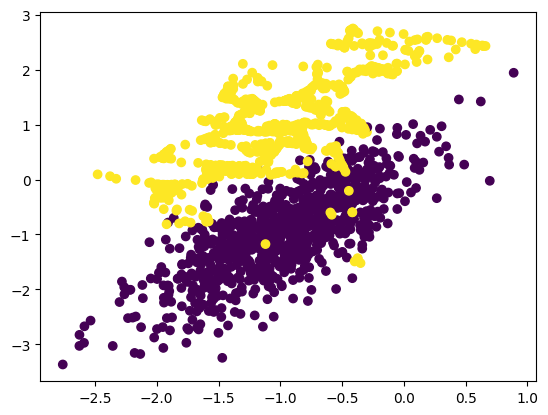

In [15]:
plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])

As we can see in the above graph, all the *minority* datapoints are connected together in a line. In the previous graph, it was visible that *minority* datapoints were not connected in that manner. This is because, <strong>SMOTE</strong> inserts new datapoints between the already existing points.

*Difference between <strong>Upsampling</strong> and <strong>SMOTE</strong>*<br>
*Upsampling* basically creates duplicates of the existing datapoints.<br>
*SMOTE* basically inserts new datapoints between the existing ones.